In [87]:
import os
import xarray as xr
import rasterio
from rasterio.transform import from_origin
from datetime import datetime
from concurrent.futures import ProcessPoolExecutor
import numpy as np
import matplotlib.pyplot as plt
from pyproj import CRS

def adjust_longitude(nc_data):
    """将 NetCDF 数据的经度调整到 [-180, 180] 范围"""
    lon = nc_data['lon']
    # 检查并调整经度范围
    if lon.max() > 180:
        lon = ((lon + 180) % 360) - 180  # 将经度调整到 [-180, 180]
        nc_data = nc_data.assign_coords(lon=lon)
        nc_data = nc_data.sortby('lon')  # 根据调整后的经度排序
    return nc_data


def date_to_yearday(date_str):
    """将日期字符串转换为年积日"""
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    day_of_year = date_obj.timetuple().tm_yday
    yearday_str = f"{day_of_year:03d}"
    return yearday_str


def process_nc_file(file_path, output_dir):
    """处理每个 .nc 文件，将每天的数据保存为 TIF 文件"""
    # 打开 NetCDF 文件
    dataset = xr.open_dataset(file_path)
    dataset = adjust_longitude(dataset)
    # 获取降水数据
    pre_data = dataset['Precipitation_Flux']

    # 获取时间维度
    time_dimension = pre_data.shape[0]

    # 提取每一天的数据并保存为 TIF
    for i in range(time_dimension):
        # 获取当前时间点的数据
        data_to_save = pre_data.isel(time=i).values  # 获取第 i 天的数据
        # 去除第一维的第一个元素，得到(1800, 3600)的数据
        data_to_save = data_to_save[1:, ] 
        current_time = str(pre_data['time'].values[i])[:10]  # 获取当前时间，前十个字符（YYYY-MM-DD）

        # 设置 TIF 文件的输出路径
        output_tif_path = os.path.join(output_dir, f"ERA5Land_Pre_{current_time}_{date_to_yearday(current_time)}.tif")

        # 检查 TIF 文件是否已存在，避免重复保存
        # if not os.path.exists(output_tif_path):
            # 创建 TIF 文件
        with rasterio.open(
                output_tif_path,
                'w',
                driver='GTiff',
                height=data_to_save.shape[0],
                width=data_to_save.shape[1],
                count=1,
                dtype=data_to_save.dtype,
                crs=wgs84_wkt,
                transform=from_origin(-180, 90, 0.1, 0.1),
                compress="LZW"
        ) as dst:
            dst.write(data_to_save, 1)

        print(f"Saved {output_tif_path}")

    # 关闭数据集
    dataset.close()


def process_all_nc_files(folder, output_dir):
    """处理所有 .nc 文件，利用多进程加速"""
    nc_files = []
    # 遍历主文件夹下的所有子文件夹和文件
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.nc'):
                nc_files.append(os.path.join(root, file))

    # 创建保存 TIF 文件的目录
    os.makedirs(output_dir, exist_ok=True)

    # 使用进程池并行处理每个 .nc 文件
    with ProcessPoolExecutor(max_workers=20) as executor:
        for file_path in sorted(nc_files):
            executor.submit(process_nc_file, file_path, output_dir)



if __name__ == "__main__":
    # 设置文件夹路径
    folder = r"/mnt/g/ERA5-LAND/nc/prep"
    output_dir = r"/mnt/g/ERA5-LAND/tiff/prep"
    # 处理所有 .nc 文件
    process_all_nc_files(folder, output_dir)



Saved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-09-01_244.tif
Saved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-10-01_274.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-02-01_032.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-12-01_335.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1982-03-01_060.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1982-06-01_152.tif




Saved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1982-08-01_213.tif
Saved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-01-01_001.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1982-02-01_032.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-06-01_152.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1982-07-01_182.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-05-01_121.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1982-05-01_121.tif


Saved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-07-01_182.tifSaved /mnt/g/ERA5-LAND/tiff/prep/ERA5Land_Pre_1981-11-01_305.tifSaved /mnt/g/ERA5-LAND/tiff/pr

In [92]:
import os
import xarray as xr
import rasterio
from rasterio.transform import from_origin
from datetime import datetime
from concurrent.futures import ProcessPoolExecutor
import numpy as np
import matplotlib.pyplot as plt
from pyproj import CRS


#需要改的有process_nc_file里变量名字
#需要改的有TIF 文件的输出名称
def adjust_longitude(nc_data):
    """将 NetCDF 数据的经度调整到 [-180, 180] 范围"""
    lon = nc_data['lon']
    # 检查并调整经度范围
    if lon.max() > 180:
        lon = ((lon + 180) % 360) - 180  # 将经度调整到 [-180, 180]
        nc_data = nc_data.assign_coords(lon=lon)
        nc_data = nc_data.sortby('lon')  # 根据调整后的经度排序
    return nc_data


def date_to_yearday(date_str):
    """将日期字符串转换为年积日"""
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    day_of_year = date_obj.timetuple().tm_yday
    yearday_str = f"{day_of_year:03d}"
    return yearday_str


def process_nc_file(file_path, output_dir):
    """处理每个 .nc 文件，将每天的数据保存为 TIF 文件"""
    # 打开 NetCDF 文件
    dataset = xr.open_dataset(file_path)
    dataset = adjust_longitude(dataset)
    # 获取降水数据
    pre_data = dataset['Temperature_Air_2m_Min_24h']

    # 获取时间维度
    time_dimension = pre_data.shape[0]

    # 提取每一天的数据并保存为 TIF
    for i in range(time_dimension):
        # 获取当前时间点的数据
        data_to_save = pre_data.isel(time=i).values  # 获取第 i 天的数据
        # 去除第一维的第一个元素，得到(1800, 3600)的数据
        data_to_save = data_to_save[1:, ] 
        current_time = str(pre_data['time'].values[i])[:10]  # 获取当前时间，前十个字符（YYYY-MM-DD）

        # 设置 TIF 文件的输出路径
        output_tif_path = os.path.join(output_dir, f"ERA5Land_mintemp_{current_time}_{date_to_yearday(current_time)}.tif")

        # 检查 TIF 文件是否已存在，避免重复保存
        # if not os.path.exists(output_tif_path):
            # 创建 TIF 文件
        with rasterio.open(
                output_tif_path,
                'w',
                driver='GTiff',
                height=data_to_save.shape[0],
                width=data_to_save.shape[1],
                count=1,
                dtype=data_to_save.dtype,
                crs=wgs84_wkt,
                transform=from_origin(-180, 90, 0.1, 0.1),
                compress="LZW"
        ) as dst:
            dst.write(data_to_save, 1)

        print(f"Saved {output_tif_path}")

    # 关闭数据集
    dataset.close()


def process_all_nc_files(folder, output_dir):
    """处理所有 .nc 文件，利用多进程加速"""
    nc_files = []
    # 遍历主文件夹下的所有子文件夹和文件
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.nc'):
                nc_files.append(os.path.join(root, file))

    # 创建保存 TIF 文件的目录
    os.makedirs(output_dir, exist_ok=True)

    # 使用进程池并行处理每个 .nc 文件
    with ProcessPoolExecutor(max_workers=20) as executor:
        for file_path in sorted(nc_files):
            executor.submit(process_nc_file, file_path, output_dir)



if __name__ == "__main__":
    # 设置文件夹路径
    folder = r"/mnt/g/ERA5-LAND/nc/mintemp"
    output_dir = r"/mnt/g/ERA5-LAND/tiff/mintemp"
    # 处理所有 .nc 文件
    process_all_nc_files(folder, output_dir)



Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-08_008.tif
Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-11_011.tifSaved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-12_012.tif

Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-07_007.tifSaved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-05_005.tif

Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-18_018.tif
Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-04_004.tif
Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-09_009.tifSaved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-13_013.tif

Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-23_023.tif
Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-06_006.tifSaved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-10_010.tif

Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-22_022.tif
Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-25_

In [138]:
import os
import xarray as xr
import rasterio
from rasterio.transform import from_origin
from datetime import datetime
from concurrent.futures import ProcessPoolExecutor
import numpy as np
import matplotlib.pyplot as plt
from pyproj import CRS


#需要改的有process_nc_file里变量名字
#需要改的有TIF 文件的输出名称
def adjust_longitude(nc_data):
    """将 NetCDF 数据的经度调整到 [-180, 180] 范围"""
    lon = nc_data['longitude']
    # 检查并调整经度范围
    if lon.max() > 180:
        lon = ((lon + 180) % 360) - 180  # 将经度调整到 [-180, 180]
        nc_data = nc_data.assign_coords(lon=lon)
        nc_data = nc_data.sortby('lon')  # 根据调整后的经度排序
    return nc_data


def date_to_yearday(date_str):
    """将日期字符串转换为年积日"""
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    day_of_year = date_obj.timetuple().tm_yday
    yearday_str = f"{day_of_year:03d}"
    return yearday_str


def process_nc_file(file_path, output_dir):
    """处理每个 .nc 文件，将每天的数据保存为 TIF 文件"""
    # 打开 NetCDF 文件
    dataset = xr.open_dataset(file_path)
    dataset = adjust_longitude(dataset)
    # 获取降水数据
    pre_data = dataset['t2m']

    # 获取时间维度
    time_dimension = pre_data.shape[0]

    # 提取每一天的数据并保存为 TIF
    for i in range(time_dimension):
        # 获取当前时间点的数据
        data_to_save = pre_data.isel(valid_time=i).values  # 获取第 i 天的数据
        # 去除第一维的第一个元素，得到(1800, 3600)的数据
        data_to_save = data_to_save[1:, ] 
        current_time = str(pre_data['valid_time'].values[i])[:10]  # 获取当前时间，前十个字符（YYYY-MM-DD）

        # 设置 TIF 文件的输出路径
        output_tif_path = os.path.join(output_dir, f"ERA5Land_mintemp_{current_time}_{date_to_yearday(current_time)}.tif")

        # 检查 TIF 文件是否已存在，避免重复保存
        # if not os.path.exists(output_tif_path):
            # 创建 TIF 文件
        with rasterio.open(
                output_tif_path,
                'w',
                driver='GTiff',
                height=data_to_save.shape[0],
                width=data_to_save.shape[1],
                count=1,
                dtype=data_to_save.dtype,
                crs=wgs84_wkt,
                transform=from_origin(-180, 90, 0.1, 0.1),
                compress="LZW"
        ) as dst:
            dst.write(data_to_save, 1)

        print(f"Saved {output_tif_path}")

    # 关闭数据集
    dataset.close()

file_path = r"/mnt/g/ERA5-LAND/nc/mintemp/mintemp data2011/Temperature-Air-2m-Min-24h_C3S-glob-agric_AgERA5_20110101-03_final-v1.0.nc"
output_dir = r"/mnt/g/ERA5-LAND/tiff/mintemp"
process_nc_file(file_path, output_dir)


Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-01_001.tif
Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-02_002.tif
Saved /mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_2011-01-03_003.tif


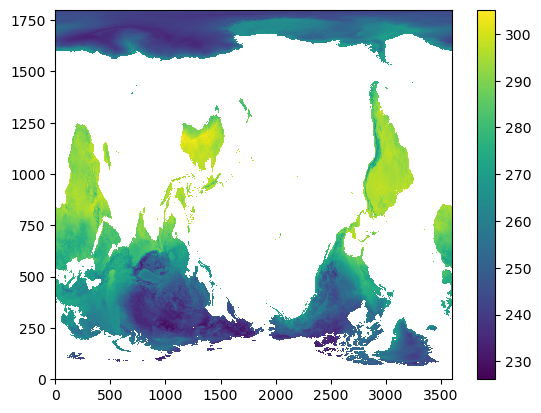

In [147]:
data = xr.open_dataset(r"/mnt/g/ERA5-LAND/nc/mintemp/mintemp data2011/Temperature-Air-2m-Min-24h_C3S-glob-agric_AgERA5_20110101-03_final-v1.0.nc")
plt.pcolormesh(data.t2m[0])
plt.colorbar()

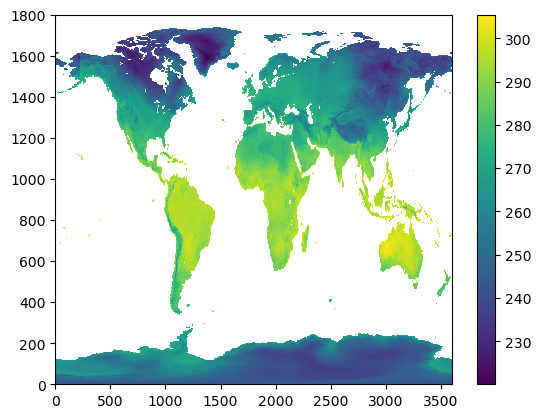

In [150]:

# 打开TIFF文件
tiff_file_path = "/mnt/g/ERA5-LAND/tiff/mintemp/ERA5Land_mintemp_1981-01-01_001.tif"
with rasterio.open(tiff_file_path) as src:
    data = src.read(1)  # 读取第一个波段的数据，对于单波段数据一般是索引为1
    transform = src.transform
    crs = src.crs

data = np.flipud(data)

plt.pcolormesh(data)
plt.colorbar()

In [122]:
import os

temperature_folder_path = '/mnt/g/ERA5-LAND/tiff/mintemp'
precipitation_folder_path = '/mnt/g/ERA5-LAND/tiff/prep'

# 用于存储降水文件的关键部分（日期和数字）
precipitation_file_parts = []
# 用于存储温度文件的关键部分（日期和数字）
temperature_file_parts = []

# 遍历降水文件夹，提取文件名的关键部分
for root, dirs, files in os.walk(precipitation_folder_path):
    for file in files:
        file_name_parts = file.split("_")[1:]
        key_part = "_".join(file_name_parts)
        key_part = key_part[4:]
        precipitation_file_parts.append(key_part)

# 遍历温度文件夹，提取文件名的关键部分
for root, dirs, files in os.walk(temperature_folder_path):
    for file in files:
        file_name_parts = file.split("_")[1:]
        key_part = "_".join(file_name_parts)
        key_part = key_part[8:]
        temperature_file_parts.append(key_part)

# 找出温度文件夹中缺少的文件关键部分
missing_file_parts = set(precipitation_file_parts) - set(temperature_file_parts)
print("温度文件夹缺少的文件关键部分如下：")
for part in missing_file_parts:
    print(part)

温度文件夹缺少的文件关键部分如下：
2012-01-03_003.tif
2011-01-01_001.tif
2012-01-02_002.tif
2012-01-01_001.tif
2011-01-03_003.tif
2011-01-02_002.tif


## 绘制一下2006年的mean年均温，检验ERA5-LAND数据是否有问题

In [2]:
import os
import xarray as xr
import rasterio
from rasterio.transform import from_origin
from datetime import datetime
from concurrent.futures import ProcessPoolExecutor
import numpy as np
import matplotlib.pyplot as plt
from pyproj import CRS

In [ ]:

path_tmean = r'/mnt/d/study/组会/mean2006/'
filename = os.listdir(path_tmean)

Tmax_month =np.full((12,1801,3600),fill_value=np.nan)

#将文件夹内的每一个文件遍历操作
i = 0
for file in filename:
    inputfile = os.path.join(path_tmean,file)
    tmean_year = xr.open_dataset(inputfile)
    Tmax_month[i,:,:] = np.amax(tmean_year.Temperature_Air_2m_Mean_24h, axis=0)
    i = i + 1

#对每个月再求最大值
Tmax_year = np.nanmax(Tmax_month, axis= 0)


/tmp/ipykernel_552/3453722524.py:21: RuntimeWarning: All-NaN slice encountered
  Tmax_year = np.nanmax(Tmax_month, axis= 0)


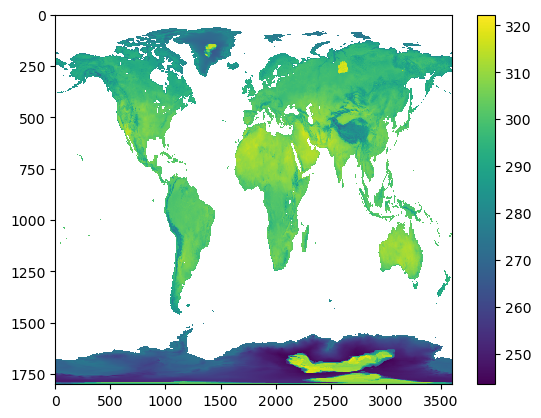

In [12]:
fig, ax = plt.subplots()
c = ax.pcolormesh(Tmax_year)

# 反转Y轴
ax.invert_yaxis()

# 添加颜色条
fig.colorbar(c)

# 显示图形
plt.show()

## 检查一下降水的nc

In [6]:
inputfile = r'/mnt/d/study/组会/Precipitation-Flux_C3S-glob-agric_AgERA5_daily_19810101-19810131_final-v1.0.nc'
pre_data = xr.open_dataset(inputfile)
pre_data

<xarray.Dataset>
Dimensions:             (time: 31, lon: 3600, lat: 1801)
Coordinates:
  * time                (time) datetime64[ns] 1981-01-01 ... 1981-01-31
  * lon                 (lon) float64 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
  * lat                 (lat) float64 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
Data variables:
    Precipitation_Flux  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    history:      Fri Jun 14 14:52:14 2019: cdo -z zip_4 -f nc4 -O mergetime ...
    Conventions:  CF-1.7
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

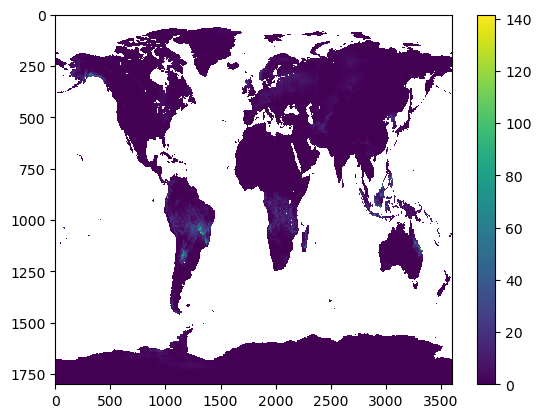

In [7]:
fig, ax = plt.subplots()
c = ax.pcolormesh(pre_data.Precipitation_Flux[0])

# 反转Y轴
ax.invert_yaxis()

# 添加颜色条
fig.colorbar(c)

# 显示图形
plt.show()

In [8]:
inputfile = r'/mnt/d/study/组会/Temperature-Air-2m-Min-24h_C3S-glob-agric_AgERA5_daily_19810101-19810131_final-v1.0.nc'
tmin_data = xr.open_dataset(inputfile)
tmin_data

<xarray.Dataset>
Dimensions:                     (time: 31, lon: 3600, lat: 1801)
Coordinates:
  * time                        (time) datetime64[ns] 1981-01-01 ... 1981-01-31
  * lon                         (lon) float64 -180.0 -179.9 ... 179.8 179.9
  * lat                         (lat) float64 90.0 89.9 89.8 ... -89.9 -90.0
Data variables:
    Temperature_Air_2m_Min_24h  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    history:      Fri Jun 14 14:50:13 2019: cdo -z zip_4 -f nc4 -O mergetime ...
    Conventions:  CF-1.7
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

## 中位数

In [22]:
import rasterio
import numpy as np

file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Hylobates_lar.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 59.036774


In [24]:
file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Macaca arctoides.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 86.9269


In [25]:
file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Macaca leonina.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 51.229424


In [26]:
file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Macaca_leucogenys.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 2.43703


In [27]:
file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Macaca_mulatta.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 147.35492


In [28]:
file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Macaca_munzala.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 19.572193


In [29]:
file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Trachypithecus_delacouri.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 235.587


In [30]:
file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Trachypithecus_phayrei.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 70.461266


In [31]:
file_path = r'/mnt/d/study/过去/外快/lyn/裁剪后/Trachypithecus_pileatus.tif'


# 打开TIFF文件
with rasterio.open(file_path) as src:
    # 读取图像数据为numpy数组
    image_data = src.read(1) 
    image_data[image_data < 0] = np.nan
    median_value = np.nanmedian(image_data)
    print("该波段的中位数:", median_value)

该波段的中位数: 103.19247


## 提取一下era5的土壤温度

In [3]:
import rasterio
import pandas as pd
import numpy as np
import os

# 读取包含特定点经纬度信息的CSV文件
points_df = pd.read_csv(r'/mnt/d/study/组会/data/soc/soil_bd_npp_soc.csv')
lat_columns = [col for col in points_df.columns if 'TH_LAT_' in col]
lon_columns = [col for col in points_df.columns if 'TH_LONG_' in col]

# 用于存储每个特定点每年的平均温度
yearly_temperature_data = {}


era5_tem = r'/mnt/f/ERA5-LAND/tiff/Tmean_tif'

# 年份范围
years = range(2009, 2016)

# 遍历每一年
for year in years:
    year_folder = str(year)
    # 获取对应年份文件夹下的所有TIFF文件路径
    tiff_files = [os.path.join(era5_tem, file) for file in os.listdir(era5_tem) if file.endswith('.tiff')]
    # 遍历每个特定点
    for index in range(len(points_df)):
        point_lats = [points_df.at[index, col] for col in lat_columns]
        point_lons = [points_df.at[index, col] for col in lon_columns]
        point_yearly_temperatures = []
        # 遍历当年的每个TIFF文件（代表每天的数据）
        for tiff_file in tiff_files:
            with rasterio.open(tiff_file) as src:
                # 获取对应点的温度值（这里假设TIFF文件中存储的是温度数据，并且地理坐标系统匹配）
                temperature_values = []
                for lat, lon in zip(point_lats, point_lons):
                    row, col = src.index(lon, lat)
                    try:
                        temperature_values.append(src.read(1)[row, col])
                    except IndexError:
                        continue
            if temperature_values:
                point_yearly_temperatures.append(np.nanmean(temperature_values))
        # 计算该点当年的平均温度
        avg_temperature = np.nanmean(point_yearly_temperatures) if point_yearly_temperatures else np.nan
        point_id = index  # 这里假设用索引作为点的唯一标识，你可以根据实际情况修改
        if point_id not in yearly_temperature_data:
            yearly_temperature_data[point_id] = {}
        yearly_temperature_data[point_id][year] = avg_temperature

# 将平均温度数据添加到原始CSV文件对应的点记录中
for point_id, year_temperature in yearly_temperature_data.items():
    for year, temperature in year_temperature.items():
        points_df.at[point_id, f'Avg_Temperature_{year}'] = temperature

# 保存更新后的CSV文件
points_df.to_csv(r'/mnt/d/study/组会/data/soc/soil_tem.csv', index=False)

In [ ]:
def extract_factor(lon, lat, raster_path):
    with rasterio.open(raster_path) as src:
        row, col = src.index(lon, lat)
        value = src.read(1)[row, col]
        return value

In [29]:
import rasterio
import pandas as pd
import numpy as np
import os

# 读取包含特定点经纬度信息的CSV文件
points_df = pd.read_csv(r'/mnt/d/study/组会/data/soc/soil_bd_npp_soc.csv')
lat_columns = ['TH_LAT_x']
lon_columns = ['TH_LONG_x']

# 用于存储每个特定点每年的平均温度
yearly_temperature_data = {}


era5_tem = r'/mnt/f/ERA5-LAND/tiff/Tmean_tif'

# 年份范围
years = range(2009, 2016)

# 遍历每一年
for year in years:
    year_folder = str(year)
    year_folder_path = os.path.join(era5_tem, year_folder)
    tiff_files = [os.path.join(year_folder_path, file) for file in os.listdir(year_folder_path) if file.endswith('.tif')]

In [28]:
import rasterio
import pandas as pd
import numpy as np
import os

# 读取包含特定点经纬度信息的CSV文件
points_df = pd.read_csv(r'/mnt/d/study/组会/data/soc/soil_bd_npp_soc.csv')
lat_columns = ['TH_LAT_x']
lon_columns = ['TH_LONG_x']

# 用于存储每个特定点每年的平均温度
yearly_temperature_data = {}


era5_tem = r'/mnt/f/ERA5-LAND/tiff/Tmean_tif'

# 年份范围
years = range(2009, 2016)

# 遍历每一年
for year in years:
    year_folder = str(year)
    year_folder_path = os.path.join(era5_tem, year_folder)
    tiff_files = [os.path.join(year_folder_path, file) for file in os.listdir(year_folder_path) if file.endswith('.tif')]
    # 遍历每个特定点
    for index in range(len(points_df)):
        point_lats = [points_df.at[index, col] for col in lat_columns]
        point_lons = [points_df.at[index, col] for col in lon_columns]
        point_yearly_temperatures = []
        # 遍历当年的每个TIFF文件（代表每天的数据）
        for tiff_file in tiff_files:
            with rasterio.open(tiff_file) as src:
                temperature_values = []
                for lat, lon in zip(point_lats, point_lons):
                    row, col = src.index(lon, lat)
                    temperature_values.append(src.read(1)[row, col])
            if temperature_values:
                point_yearly_temperatures.append(np.nanmean(temperature_values))
        # 计算该点当年的平均温度
        avg_temperature = np.nanmean(point_yearly_temperatures) if point_yearly_temperatures else np.nan
        point_id = index  # 这里假设用索引作为点的唯一标识，你可以根据实际情况修改
        if point_id not in yearly_temperature_data:
            yearly_temperature_data[point_id] = {}
        yearly_temperature_data[point_id][year] = avg_temperature

# 将平均温度数据添加到原始CSV文件对应的点记录中
for point_id, year_temperature in yearly_temperature_data.items():
    for year, temperature in year_temperature.items():
        points_df.at[point_id, f'Avg_Temperature_{year}'] = temperature

# 保存更新后的CSV文件
points_df.to_csv(r'/mnt/d/study/组会/data/soc/soil_tem.csv', index=False)

KeyboardInterrupt: 

In [32]:
import rasterio
import pandas as pd
import numpy as np
import os

# 设置包含特定点经纬度信息的CSV文件的绝对路径
csv_file_path = r'/mnt/d/study/组会/data/soc/soil_bd_npp_soc.csv'
# 读取包含特定点经纬度信息的CSV文件
points_df = pd.read_csv(csv_file_path)
lat_columns = ['TH_LAT_x']
lon_columns = ['TH_LONG_x']

# 假设存放各年份文件夹的根目录的绝对路径
root_folder_path = r'/mnt/f/ERA5-LAND/tiff/Tmean_tif'

# 用于存储每个特定点的平均温度
point_avg_temperature_data = {}

# 遍历每个特定点
for index in range(len(points_df)):
    point_lats = [points_df.at[index, col] for col in lat_columns]
    point_lons = [points_df.at[index, col] for col in lon_columns]
    all_temperature_values = []
    # 遍历年份范围
    for year in range(2009, 2016):
        year_folder = str(year)
        year_folder_path = os.path.join(root_folder_path, year_folder)
        tiff_files = [os.path.join(year_folder_path, file) for file in os.listdir(year_folder_path) if file.endswith('.tif')]
        # 遍历当年的每个TIFF文件
        for tiff_file in tiff_files:
            with rasterio.open(tiff_file) as src:
                for lat, lon in zip(point_lats, point_lons):
                    row, col = src.index(lon, lat)
                    all_temperature_values.append(src.read(1)[row, col])
    # 计算该点2009 - 2015年的平均温度
    avg_temperature = np.nanmean(all_temperature_values) if all_temperature_values else np.nan
    point_id = index  
    point_avg_temperature_data[point_id] = avg_temperature

# 将平均温度数据添加到原始CSV文件对应的点记录中
for point_id, temperature in point_avg_temperature_data.items():
    points_df.at[point_id, 'Avg_Temperature_2009_2015'] = temperature

# 设置保存更新后的CSV文件的绝对路径
new_csv_file_path = r'/mnt/d/study/组会/data/soc/soil_tem.csv'
# 保存更新后的CSV文件
points_df.to_csv(new_csv_file_path, index=False)

KeyboardInterrupt: 

In [41]:
import xarray as xr
import pandas as pd

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/soil_bd_npp_soc.csv')

# 使用xarray打开nc文件
ds = xr.open_dataset(r'/mnt/f/ERA5-ECI/tmm_ANN_era5_land_only_0p09_deg_1981_2019.nc')

# 选择目标年份范围的数据
ds_target_years = ds.sel(time=slice('2009', '2018'))

# 用于存储每个站点平均温度的列表
average_temperature_list = []

for index, row in df_stations.iterrows():
    station_lat = row['TH_LAT_x']
    station_lon = row['TH_LONG_x']
    # 使用最近邻插值法提取对应站点位置在目标年份范围内的温度数据
    data_values = ds_target_years.sel(lat=station_lat, lon=station_lon, method='nearest')['tmm'].values
    # 计算平均温度，忽略可能存在的缺失值（NaN）
    average_temperature = data_values[data_values == data_values].mean()
    average_temperature_list.append(average_temperature)


# 将平均温度列添加到DataFrame中
df_stations['Average_Temperature_2009_2018'] = average_temperature_list
df_stations.to_csv('/mnt/d/study/组会/data/SOC/tmm_soil_xxx.csv', index=False)


/tmp/ipykernel_720/2183668918.py:22: RuntimeWarning: Mean of empty slice.
  average_temperature = data_values[data_values == data_values].mean()
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_720/2183668918.py:22: RuntimeWarning: Mean of empty slice.
  average_temperature = data_values[data_values == data_values].mean()
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_720/2183668918.py:22: RuntimeWarning: Mean of empty slice.
  average_temperature = data_values[data_values == data_values].mean()
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_720/2183668918.py:22: 

In [39]:
import xarray as xr
import pandas as pd

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/soil_bd_npp_soc.csv')

# 使用xarray打开降水数据的nc文件
ds_precipitation = xr.open_dataset(r'/mnt/f/ERA5-ECI/era5_land_only_annual_total_rainfall_mm_1981_2019.nc4')

# 选择温度数据和降水数据在目标年份范围（2009 - 2018年）内的数据
ds_precipitation_target_years = ds_precipitation.sel(time=slice('2009', '2018'))

# 用于存储每个站点平均降水的列表
average_precipitation_list = []

for index, row in df_stations.iterrows():
    station_lat = row['TH_LAT_x']
    station_lon = row['TH_LONG_x']
    # 提取对应站点位置在目标年份范围内的降水数据并计算平均降水
    precipitation_values = ds_precipitation_target_years.sel(lat=station_lat, lon=station_lon, method='nearest')['rainfall'].values
    average_precipitation = precipitation_values[precipitation_values == precipitation_values].mean()
    average_precipitation_list.append(average_precipitation)

df_stations['Average_Precipitation_2009_2018'] = average_precipitation_list

# 将更新后的DataFrame保存为新的CSV文件
#df_stations.to_csv('/mnt/d/study/组会/data/SOC/txx_soc.csv', index=False)

/tmp/ipykernel_720/3136725635.py:21: RuntimeWarning: Mean of empty slice.
  average_precipitation = precipitation_values[precipitation_values == precipitation_values].mean()
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_720/3136725635.py:21: RuntimeWarning: Mean of empty slice.
  average_precipitation = precipitation_values[precipitation_values == precipitation_values].mean()
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_720/3136725635.py:21: RuntimeWarning: Mean of empty slice.
  average_precipitation = precipitation_values[precipitation_values == precipitation_values].mean()
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encounter

KeyboardInterrupt: 